# Data Analysis Project: Home sales in King County (USA)

This project is centered around exploratory data
analysis techniques and presentation of results to a client.

# The data

- You will use the King County Housing Data: This dataset contains information about home sales in King County (USA).
- You will find the data in the eda schema of our database. You can access it via DBeaver. Please save the csv file in the data folder where it will not be uploaded to github.
- Please explore the dataset in DBeaver and come up with a Join for the 2 tables.
- The description of the column names can be found in the `column_names.md` file.
- The column names may NOT be clear at times:

  _In the real world we will run into similar challenges. We would then go ask our business clients for more information. In this case, let us assume our business client who would give us information, left the company. Meaning we would have to identify and look up what each column names might actually mean. (google is your friend ;) )_

# The Tasks

1. Through EDA/statistical analysis above please come up with **AT LEAST 3 insights** regarding the overall data. One should be geographical.

2. In addition also come up with **AT LEAST 3 recommendations** for your client.


# The client:

| Erin Robinson       | Buyer       | Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible                                                                                 |
                                               


In [1]:
#import warnings

#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import missingno as msno

Creating a df_sales dataframe with the sales.csv file

In [3]:
df_sales = pd.read_csv('\data\sales.csv')

In [4]:
df_sales.shape

(21597, 4)

In [91]:
df_sales.head()

,date,price,house_id,sales_id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


First the id-column was deleted, but then it was decided to rename the id-column to sales_id:

In [ ]:
#df_sales.drop('id', inplace =True, axis =1)  

# inplace = True changes the dataframe permanently, an alternative would be df_sales = df_sales.drop('id', axis =1) 
# axis=1 specifies that it is a column in the dataframe

In [5]:

# Rename the column header
df_sales.rename(columns={'id': 'sales_id'}, inplace=True)

print(df_sales)


             date      price    house_id  sales_id
0      2014-10-13 221900.000  7129300520         1
1      2014-12-09 538000.000  6414100192         2
2      2015-02-25 180000.000  5631500400         3
3      2014-12-09 604000.000  2487200875         4
4      2015-02-18 510000.000  1954400510         5
...           ...        ...         ...       ...
21592  2014-05-21 360000.000   263000018     21593
21593  2015-02-23 400000.000  6600060120     21594
21594  2014-06-23 402101.000  1523300141     21595
21595  2015-01-16 400000.000   291310100     21596
21596  2014-10-15 325000.000  1523300157     21597

[21597 rows x 4 columns]


Creating a df_details dataframe with the details.csv file

In [6]:
df_details = pd.read_csv('\data\details.csv')

In [19]:
df_details.shape

(21420, 19)

In [33]:
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


Merging the df_sales and the df_details dataframes on house_id in df_sales abd id in df_details with a left merge

In [7]:
df = pd.merge (left=df_sales, right=df_details, left_on = 'house_id', right_on ='id', how='left')

Checking the columns

In [8]:
df.columns

Index(['date', 'price', 'house_id', 'sales_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Deleting the id-column

In [9]:
df.drop('id', inplace =True, axis =1)

# inplace = True changes the dataframe permanently, an alternative would be df_sales = df_sales.drop('id', axis =1) 
# axis=1 specifies that it is a column in the dataframe

In [10]:
df.head(10)

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000.000,7237550310,6,4.000,4.500,5420.000,101930.000,1.000,0.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500.000,1321400060,7,3.000,2.250,1715.000,6819.000,2.000,0.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850.000,2008000270,8,3.000,1.500,1060.000,9711.000,1.000,0.000,...,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500.000,2414600126,9,3.000,1.000,1780.000,7470.000,1.000,0.000,...,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000.000,3793500160,10,3.000,2.500,1890.000,6560.000,2.000,0.000,...,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000


In [11]:
df.shape

(21597, 22)

In [12]:
df.describe()

,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


Check how many duplicated rows exist in the dataframe

In [48]:

df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

No duplicated rows

In [51]:
df.head(5)

,date,price,house_id,sales_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


Check datatypes for each column

In [13]:
df.dtypes

date              object
price            float64
house_id           int64
sales_id           int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Datatypes are also fine

Check how many values are missing per column in the data

In [55]:
df.isna().sum()

date                0
price               0
house_id            0
sales_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

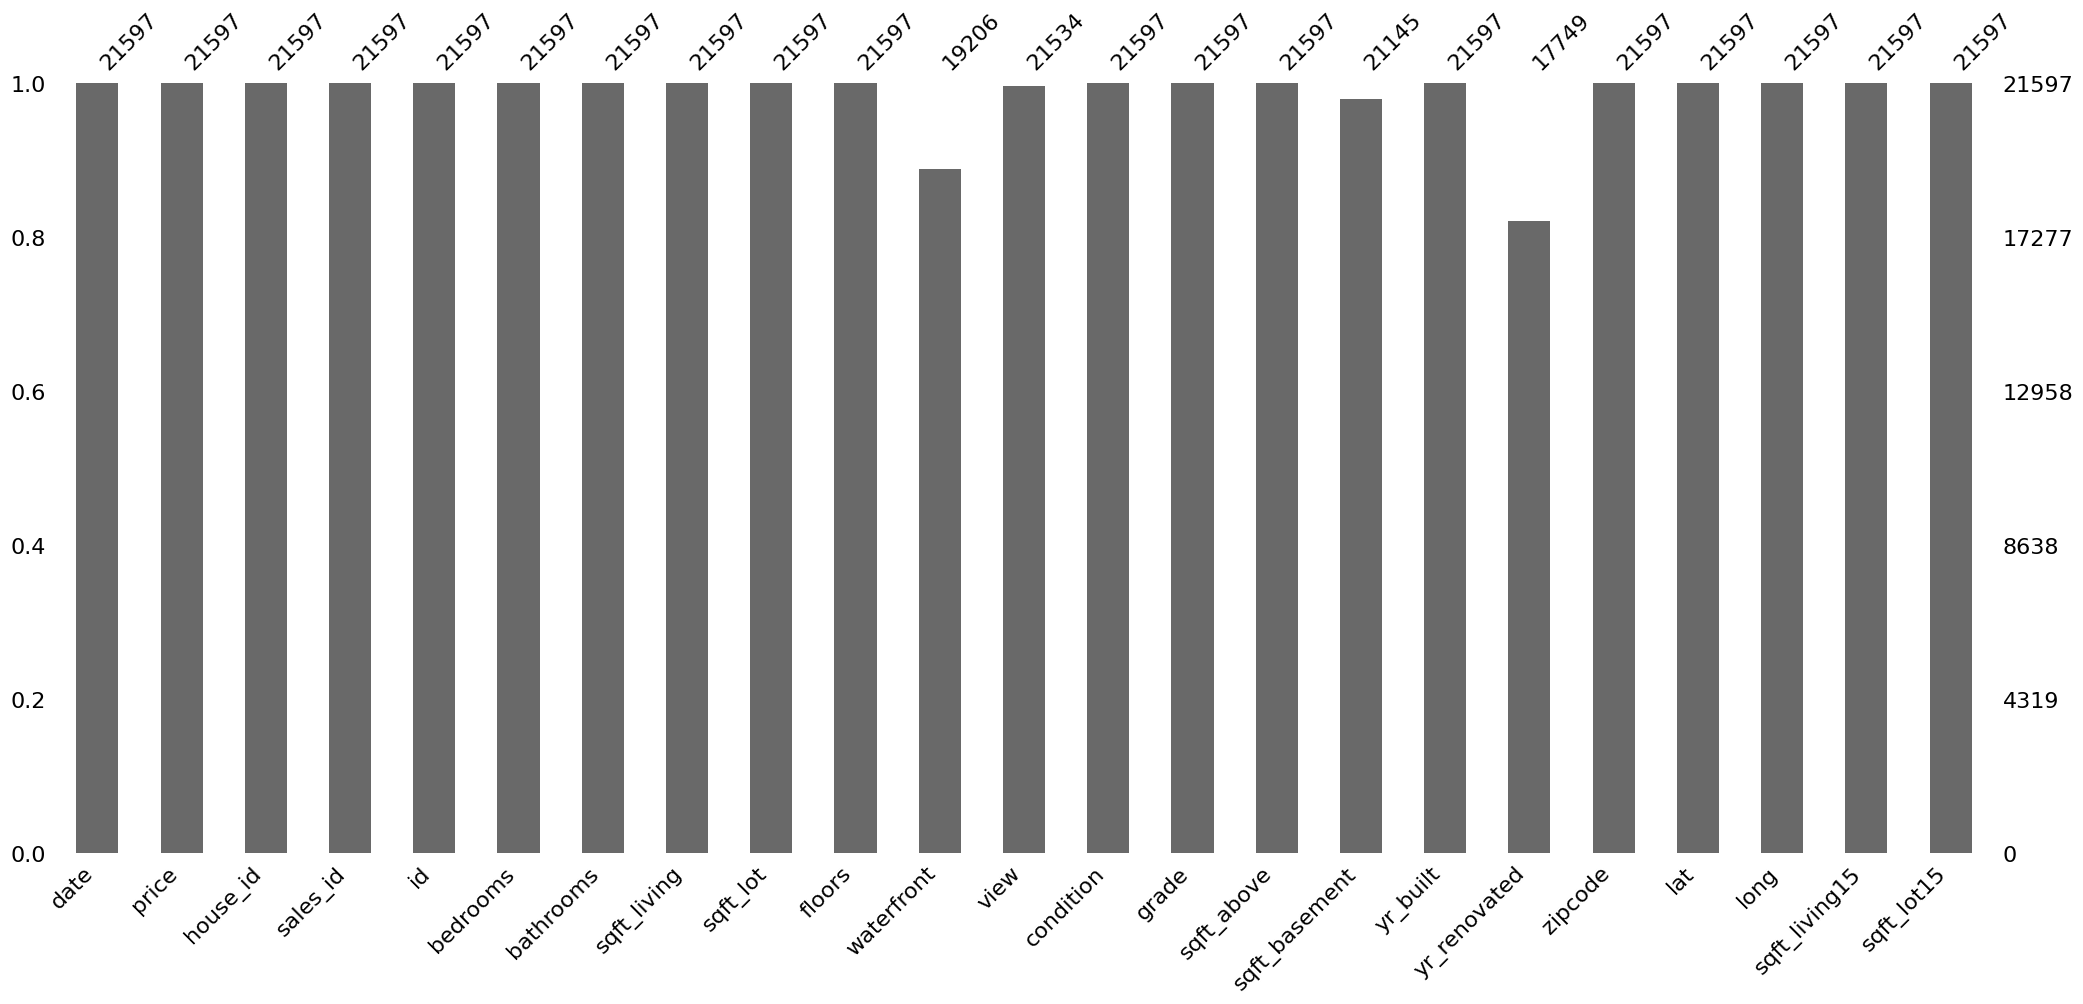

In [56]:
# plotting percentage of missing values per column
msno.bar(df)

Visualizing distribution of missing values:

<Axes: >

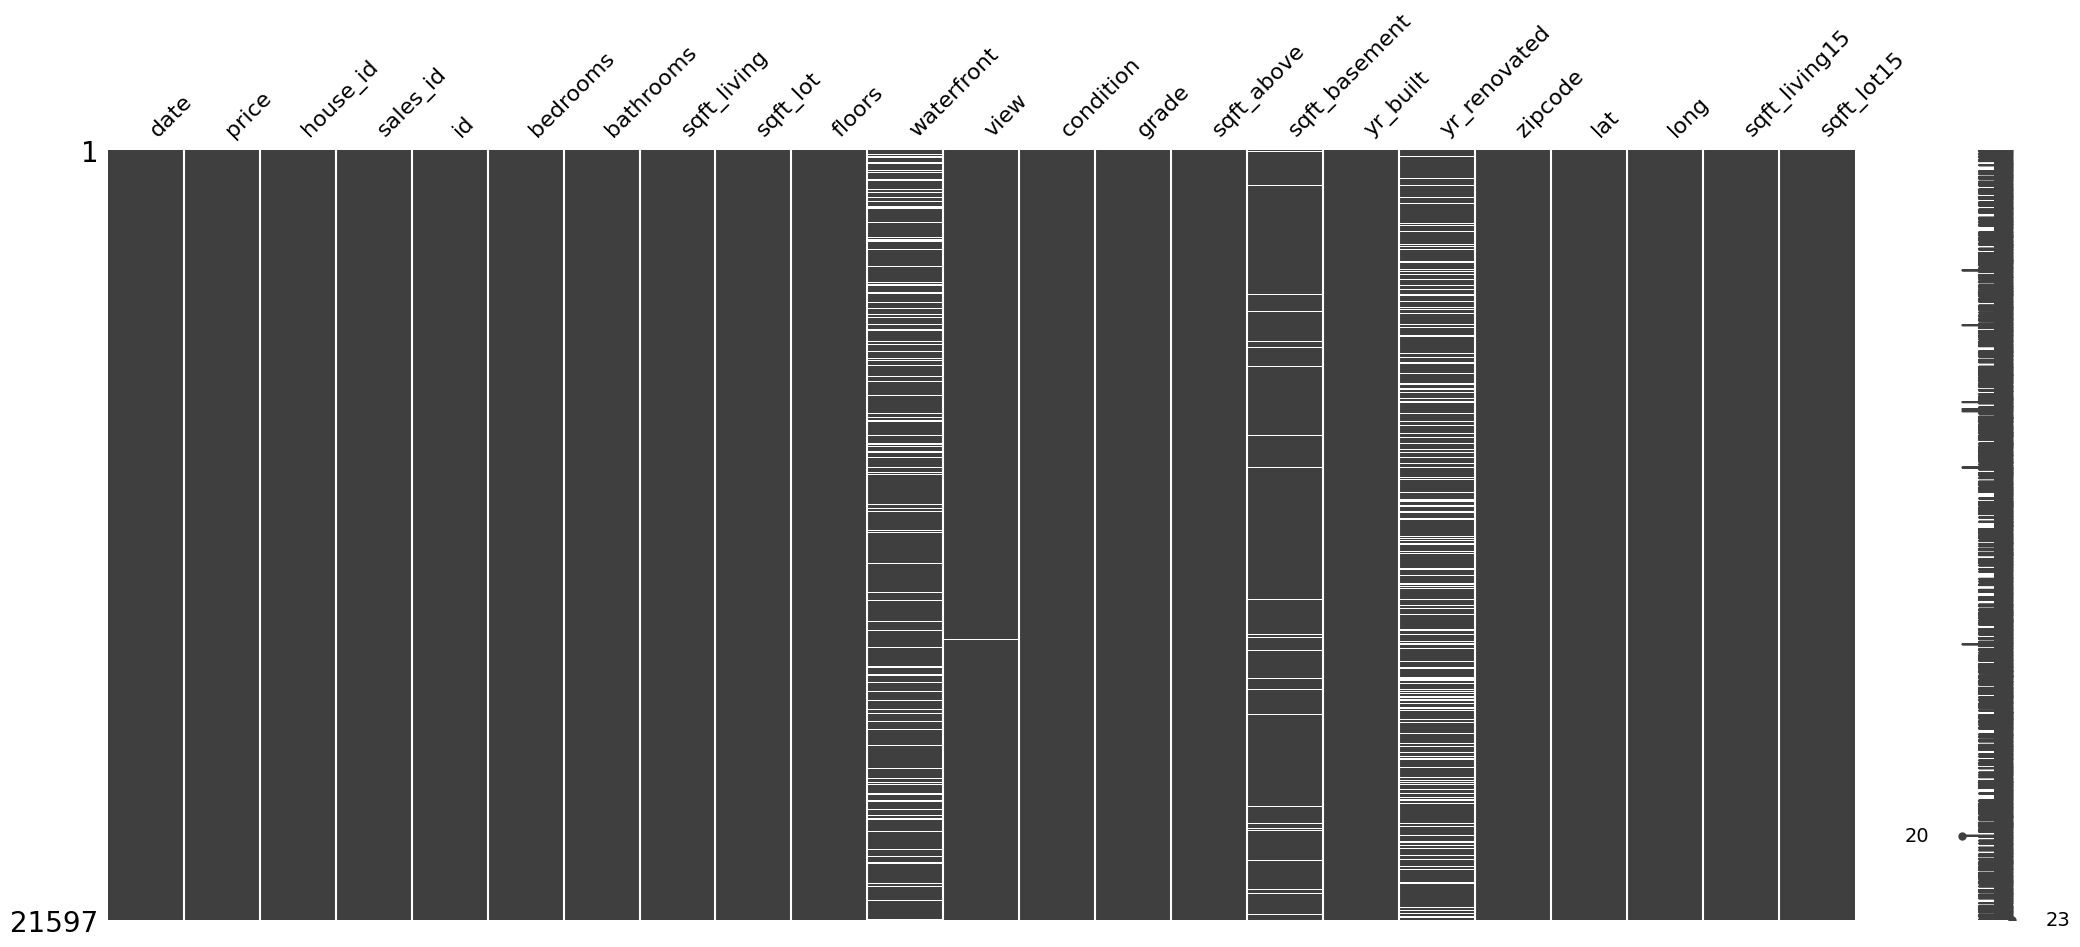

In [58]:
msno.matrix(df)

<Axes: >

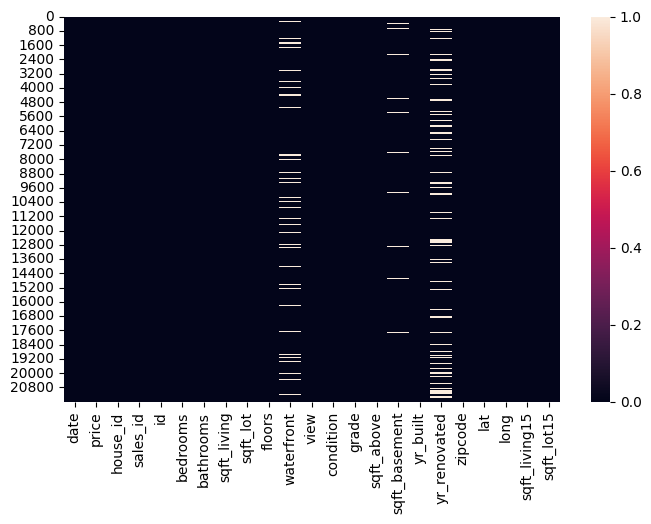

In [57]:
sns.heatmap(df.isna())

In [59]:
df.describe()

,price,house_id,sales_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [60]:
df

,date,price,house_id,sales_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


It was decided to keep the rows with the missing values, it makes sense that many houses don't have information about renovation and waterfront

---------Plotting----------------------------------------------------------------------------------------

Hypothesis: grade is related to price

 -> Plotting grade against prices with a scatter plot, also to see/show overview about all houses

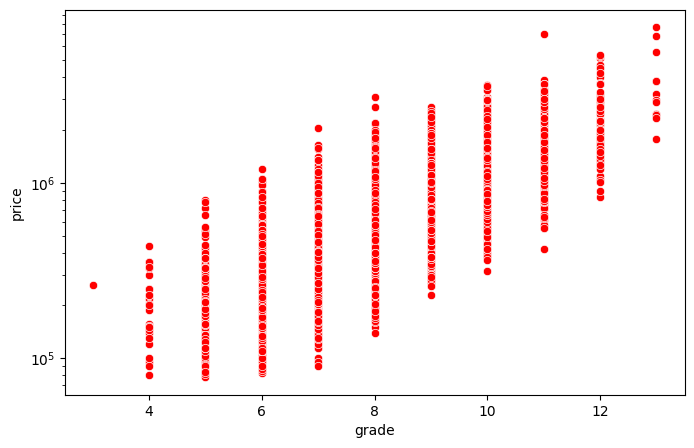

In [15]:
sns.scatterplot(data=df, x='grade', y='price', color ='red')
#logarithmic scale on y-axis:
plt.yscale('log')

Grade is related to price

Hypothesis: Condition is related to price

 -> Plotting condition against prices with a scatter plot

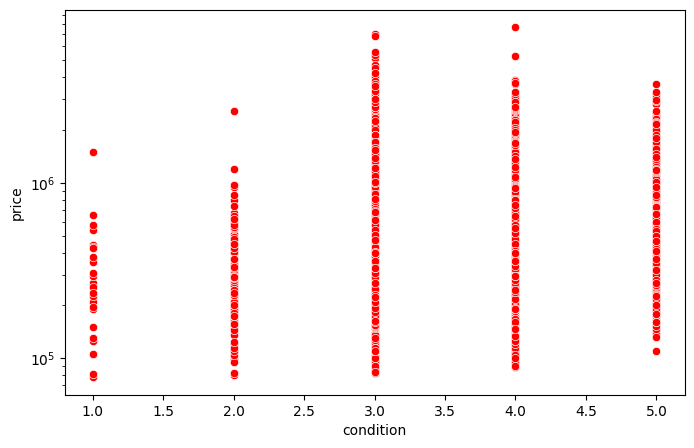

In [99]:
sns.scatterplot(data=df, x='condition', y='price', color ='red')

plt.yscale('log')

Condition is somewhat related to price

More detailed grade-price-scatterplot with custom y-axis range and title and labels:

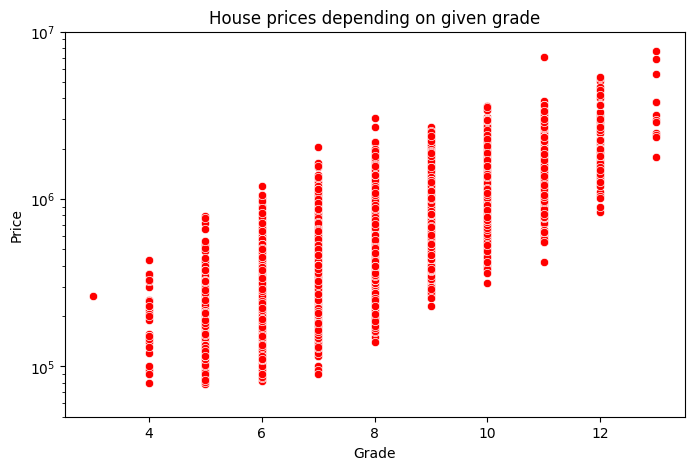

In [12]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module


# Create the scatter plot
sns.scatterplot(data=df, x='grade', y='price', color='red')

plt.yscale('log')

# Set y-axis range 
lowest_value = 50000  # Set the lowest temperature value on the y-axis
max_value = 10000000  # Set the maximum temperature value on the y-axis

plt.ylim(lowest_value, max_value)

# Add plot title and labels
plt.title("House prices depending on given grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()


Changing the step size of the x-axis with MultipleLocator:

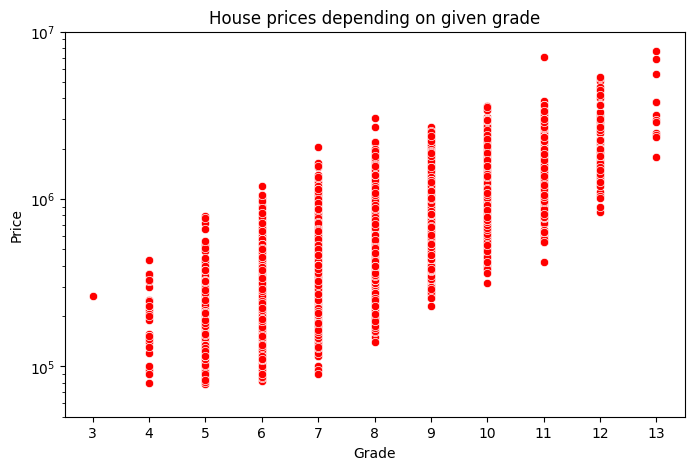

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the scatter plot
sns.scatterplot(data=df, x='grade', y='price', color='red')

plt.yscale('log')

# Set custom y-axis step size using LogLocator
lowest_value = 50000  # Set the lowest temperature value on the y-axis
max_value = 10000000  # Set the maximum temperature value on the y-axis

# Set y-axis limits
plt.ylim(lowest_value, max_value)

# Set custom x-axis step size using MultipleLocator
x_step_size = 1  # Set the x-axis step size
x_locator = ticker.MultipleLocator(base=x_step_size)
plt.gca().xaxis.set_major_locator(x_locator)

# Optional: Add plot titles and labels
plt.title("House prices depending on given grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()


In [66]:
df.describe()

,price,house_id,sales_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


Use query-function to filter dataframe for houses with a price lower than 100000
and save it as a new dataframe:

In [14]:
df_low_prices = df.query("price<100000")

df_low_prices


,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,2014-05-23,80000.000,8658300340,466,1.000,0.750,430.000,5050.000,1.000,NaN,...,4,430.000,0.000,1912,0.000,98014,47.650,-121.909,1200.000,7500.000
2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
3106,2015-02-19,89950.000,1721801591,3107,1.000,1.000,570.000,4080.000,1.000,0.000,...,5,570.000,0.000,1942,0.000,98146,47.510,-122.334,890.000,5100.000
3318,2014-12-12,95000.000,2724200705,3319,2.000,1.000,800.000,8550.000,1.000,0.000,...,7,800.000,0.000,1947,0.000,98198,47.407,-122.294,1490.000,8550.000
3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
3801,2015-05-05,95000.000,7335400215,3802,1.000,0.750,760.000,5746.000,1.000,0.000,...,5,760.000,0.000,1915,0.000,98002,47.305,-122.215,970.000,6696.000
5298,2015-01-05,99000.000,5128000010,5299,2.000,1.000,960.000,8236.000,1.000,NaN,...,6,960.000,0.000,1948,0.000,98058,47.470,-122.166,1260.000,8236.000
5718,2014-10-29,96500.000,1788800630,5719,3.000,1.000,840.000,12091.000,1.000,NaN,...,6,840.000,0.000,1959,0.000,98023,47.328,-122.343,840.000,9324.000
5860,2014-10-14,89000.000,9320900420,5861,3.000,1.000,900.000,4750.000,1.000,0.000,...,6,900.000,0.000,1969,0.000,98023,47.303,-122.363,900.000,3404.000
7985,2015-03-03,90000.000,2734100835,7986,1.000,1.000,780.000,4000.000,1.000,0.000,...,5,780.000,0.000,1905,NaN,98108,47.542,-122.321,1150.000,4000.000


Making another dataframe for houses cheaper than 85 k and sort them by the grade:

In [21]:
df_low_prices_below85 = df.query("price<85000")

df_low_prices_below85 = df_low_prices_below85.sort_values(by='grade',ascending=True)

df_low_prices_below85 

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,2014-05-23,80000.000,8658300340,466,1.000,0.750,430.000,5050.000,1.000,NaN,...,4,430.000,0.000,1912,0.000,98014,47.650,-121.909,1200.000,7500.000
2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,...,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,...,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,...,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,...,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000


Plot grade against price with this new low house prices dataframe with scatter plot:

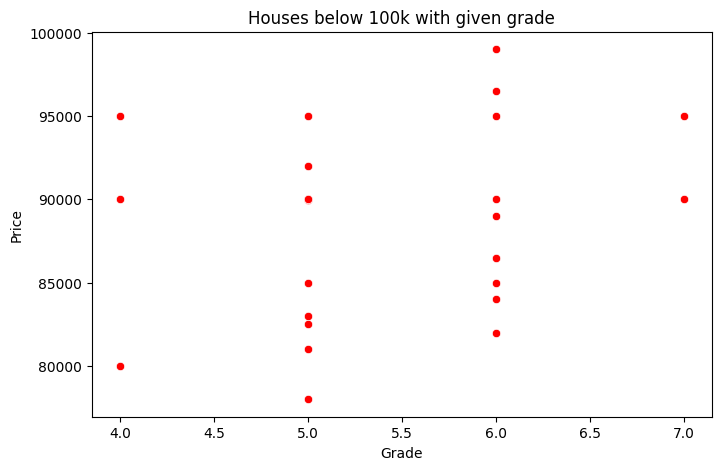

In [16]:

sns.scatterplot(data=df_low_prices, x='grade', y='price', color ='red')

#plt.yscale('log')

# Optional: Add plot titles and labels
plt.title("Houses below 100k with given grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

Trying to change scientific notation on y-axis:

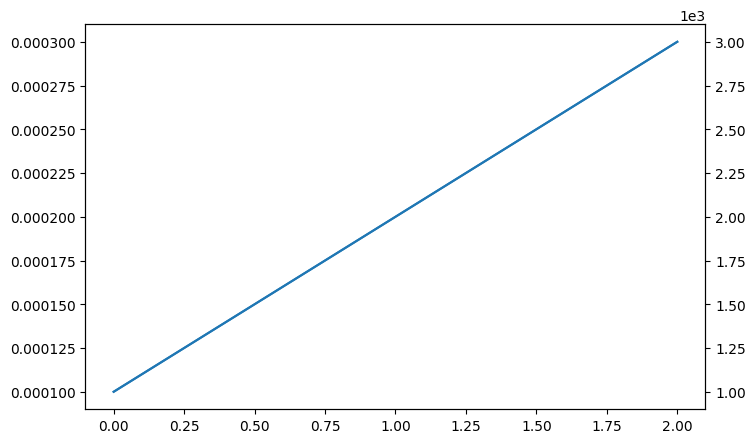

In [40]:

# Example from stackoverflow for changing scientific notation:
x =(0, 1, 2)
y1 = (1e-4, 2e-4, 3e-4)
y2 = (1000, 2000, 3000)
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1)
ax2.plot(x, y2)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))  # Only ax2

Trying the plt.ticklabel_format suggestion from stackoverflow to change the scientific notation on the y-axis:

AttributeError: This method only works with the ScalarFormatter

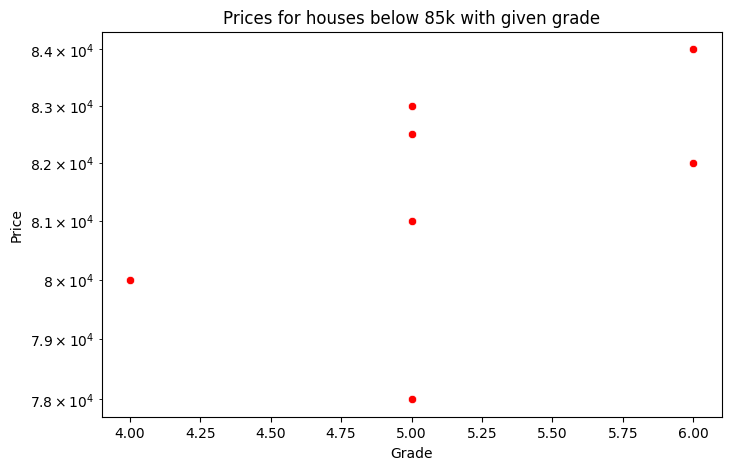

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# Your code to create the scatter plot
sns.scatterplot(data=df_low_prices_below85, x='grade', y='price', color='red')
plt.yscale('log')

# Optional: Add plot titles and labels
plt.title("Prices for houses below 85k with given grade")
plt.xlabel("Grade")
plt.ylabel("Price")

plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))


# Show the plot
plt.show()



Unfortunately it did not work

Trying out a suggestion from chatgpt:

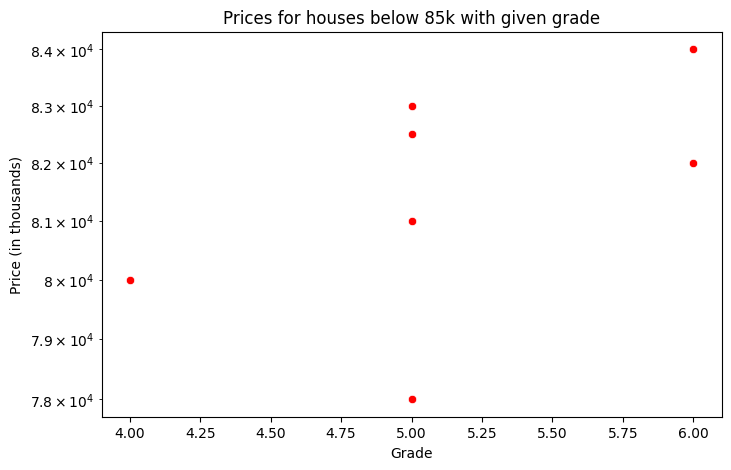

In [19]:
import matplotlib.ticker as ticker

sns.scatterplot(data=df_low_prices_below85, x='grade', y='price', color ='red')
plt.yscale('log')

# Define a custom tick formatter function
def log_tick_formatter(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val / 1000)
        return f"{val}k"
    else:
        return f"{tick_val:.0f}"

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))

# Optional: Add plot titles and labels
plt.title("Prices for houses below 85k with given grade")
plt.xlabel("Grade")
plt.ylabel("Price (in thousands)")
plt.show()






Also did not work, but I figured out that the problem was that the y-axis was still set to be logarithmic, then matplotlib is hardcoded to use scientific notation.


Without it:

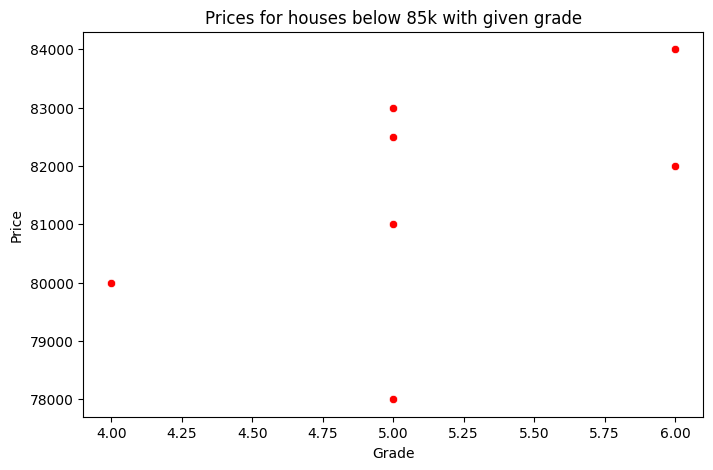

In [42]:
sns.scatterplot(data=df_low_prices_below85, x='grade', y='price', color='red')

#plt.yscale('log')   # This was the problem

# Optional: Add plot titles and labels
plt.title("Prices for houses below 85k with given grade")
plt.xlabel("Grade")
plt.ylabel("Price")

# Show the plot
plt.show()

Plotting prices against conditions with house prices below 100k:

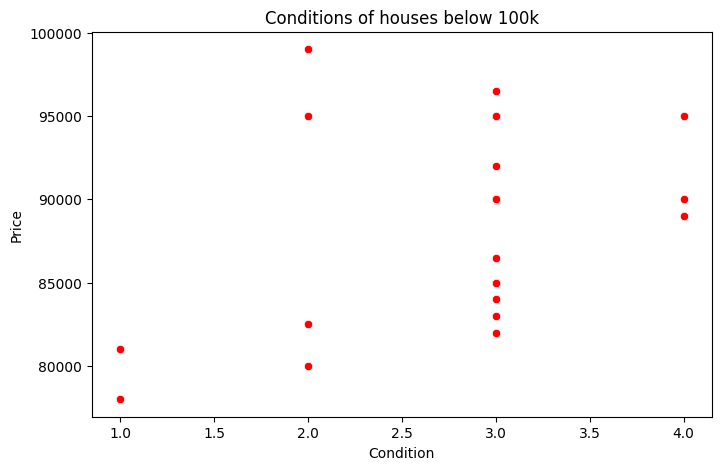

In [20]:
sns.scatterplot(data=df_low_prices, x='condition', y='price', color ='red')

#plt.yscale('log')

# Add plot titles and labels
plt.title("Conditions of houses below 100k")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

In [22]:
df_low_prices_below85.columns

Index(['date', 'price', 'house_id', 'sales_id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Making a new dataframe for houses with a price lower than 85k and sort it by the grade values: (Was done here first, put further above for more clarity)

In [19]:
df_low_prices_below85 = df.query("price<85000")

df_low_prices_below85 = df_low_prices_below85.sort_values(by='grade',ascending=True)

df_low_prices_below85 

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,2014-05-23,80000.000,8658300340,466,1.000,0.750,430.000,5050.000,1.000,NaN,...,4,430.000,0.000,1912,0.000,98014,47.650,-121.909,1200.000,7500.000
2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,...,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,...,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,...,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,...,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000


Plotting conditions against prices for houses cheaper than 85K with a scatterplot:

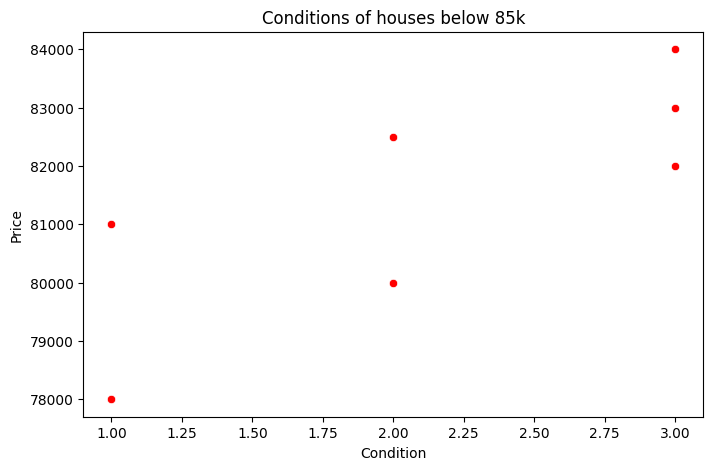

In [44]:
sns.scatterplot(data=df_low_prices_below85, x='condition', y='price', color ='red')

#plt.yscale('log')

# Optional: Add plot titles and labels
plt.title("Conditions of houses below 85k")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

Plotting grades against conditions for houses cheaper than 85k with a barplot:

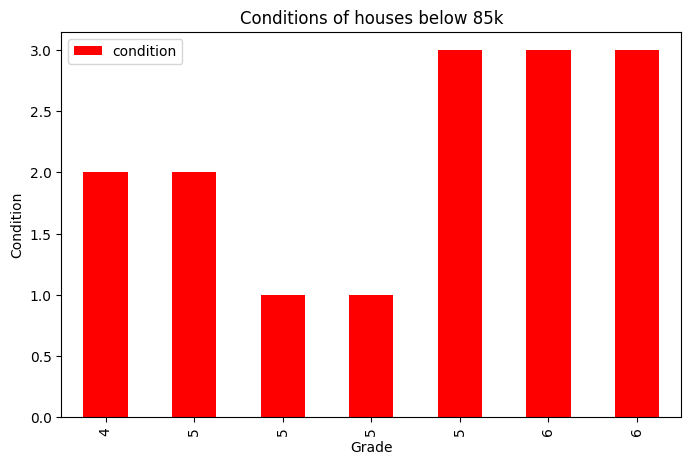

In [117]:
df_low_prices_below85.plot(kind='bar', x = 'grade', y = 'condition', color='red')

# Add plot titles and labels
plt.title("Conditions of houses below 85k")
plt.xlabel("Grade")
plt.ylabel("Condition")
plt.show()

Disabling rotation of values on the x-axis:

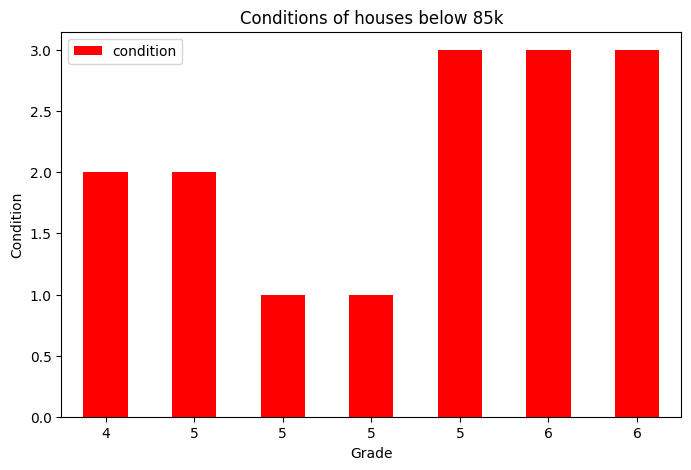

In [35]:
df_low_prices_below85.plot(kind='bar', x='grade', y='condition', color='red')

# Add plot titles and labels
plt.title("Conditions of houses below 85k")
plt.xlabel("Grade")
plt.ylabel("Condition")

# No rotation for x-axis tick labels
plt.xticks(rotation=0)  

plt.show()


Expanding the values on the y-axis for a better/more truthful visualisation(conditions range from 1 to 5):

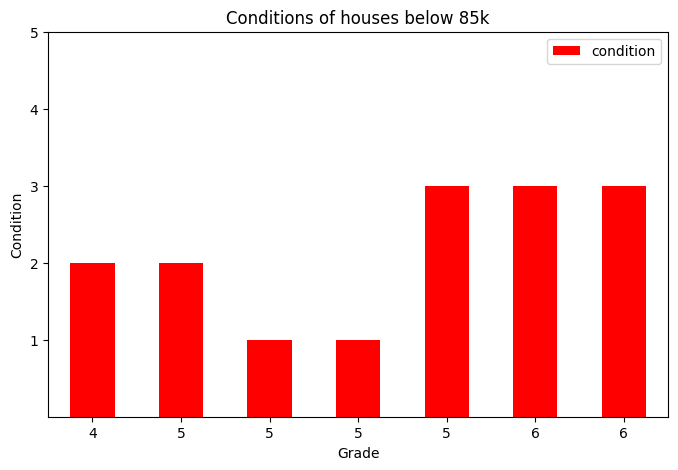

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_low_prices_below85
df_low_prices_below85.plot(kind='bar', x='grade', y='condition', color='red')

# Add plot titles and labels
plt.title("Conditions of houses below 85k")
plt.xlabel("Grade")
plt.ylabel("Condition")
plt.xticks(rotation=0)  


# Customize the y-axis ticks
custom_ticks = [1, 2, 3, 4, 5] 
plt.yticks(custom_ticks)

plt.show()


Adding different colors, so that every grade value has a distinct color, 
also creating custom legend labels for that:

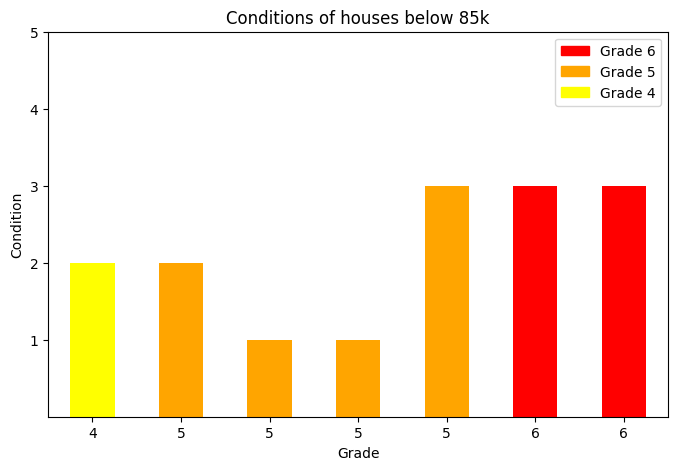

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a dictionary to map grade values to colors
grade_colors = {6: 'red', 5: 'orange', 4: 'yellow', 3: 'green', 2: 'blue'}

# Map the grade values to colors using the dictionary
colors = df_low_prices_below85['grade'].map(grade_colors)

# Plot the data using the specified colors
ax = df_low_prices_below85.plot(kind='bar', x='grade', y='condition', color=colors)

# Add plot titles and labels
plt.title("Conditions of houses below 85k")
plt.xlabel("Grade")
plt.ylabel("Condition")
plt.xticks(rotation=0)  

# Customize the y-axis ticks
custom_ticks = [1, 2, 3, 4, 5] 
plt.yticks(custom_ticks)

# Create custom legend labels and handles
legend_labels = ['Grade 6', 'Grade 5', 'Grade 4']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(grade_colors.values(), legend_labels)]

# Add the custom legend to the plot
plt.legend(handles=legend_handles)

# Show the plot
plt.show()


Plotting grades against number of bedrooms for houses cheaper than 85k:

Text(0, 0.5, 'Number of bedrooms')

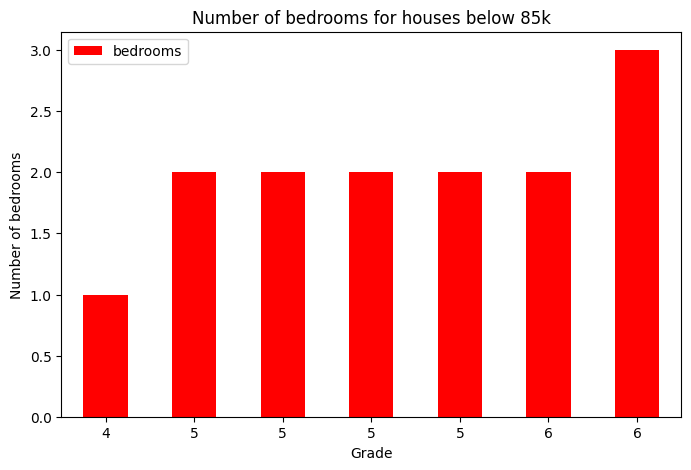

In [46]:
df_low_prices_below85.plot(kind='bar', x = 'grade', y = 'bedrooms', color='red')
plt.xticks(rotation=0) 
# Add plot titles and labels
plt.title("Number of bedrooms for houses below 85k")
plt.xlabel("Grade")
plt.ylabel("Number of bedrooms")


Googled how to display all columns with describe-function:

In [108]:
pd.set_option('display.max_columns', None)
df.describe()

,price,house_id,sales_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


Making geo-plot with folium (credits to larixlarix),

first for the 7 houses, which are cheaper than 85k:

In [48]:

# Import folium
import folium
from folium import Marker

# Find houses in pandas dataframe df that our client might be interested in
#interesting_houses = df.query('bedrooms >= 3 and price <= 500000 and waterfront == 1')

# Define a map, centered at Space Needle in Seattle 
# ...you might also check out other options for tiles, e.g. tiles='openstreetmap'
map = folium.Map(location=[47.6,-122.33], tiles='cartodbpositron', zoom_start=8)

# Add markers to the map
for idx, row in df_low_prices_below85.iterrows():
    Marker([row['lat'], row['long']]).add_to(map)

# Show the map
map

Research revealed that 6 of them are located in a poor neighborhood, but one of them is not.\
-> Client was explicitely interested in poor neighborhoods, therefore drop the one house:

In [60]:


df_low_prices_below85 = df.query('price < 85000')

df_low_prices_below85_index_reset = df_low_prices_below85.reset_index()

df_low_prices_below85_poor_NH = df_low_prices_below85_index_reset.drop(0)

df_low_prices_below85_poor_NH


,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,...,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,...,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,...,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,...,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000


In [61]:
pd.set_option('display.max_columns', None)

df_low_prices_below85_poor_NH


,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,0.000,2,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,0.000,3,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,0.000,3,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,0.000,1,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,0.000,1,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,0.000,3,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000


Comparing these 6 houses with some bar plots:

First a bar plot for comparing the conditions, therefore the dataframe should be sorteg by the condition:

In [64]:
df_low_prices_below85_poor_NH_sorted_conditions = df_low_prices_below85_poor_NH.sort_values(by='condition')

df_low_prices_below85_poor_NH_sorted_conditions = df_low_prices_below85_poor_NH_sorted_conditions.sort_values(by='grade')

df_low_prices_below85_poor_NH_sorted_conditions 

,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,0.000,1,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,0.000,1,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,0.000,2,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,0.000,3,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,0.000,3,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,0.000,3,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000


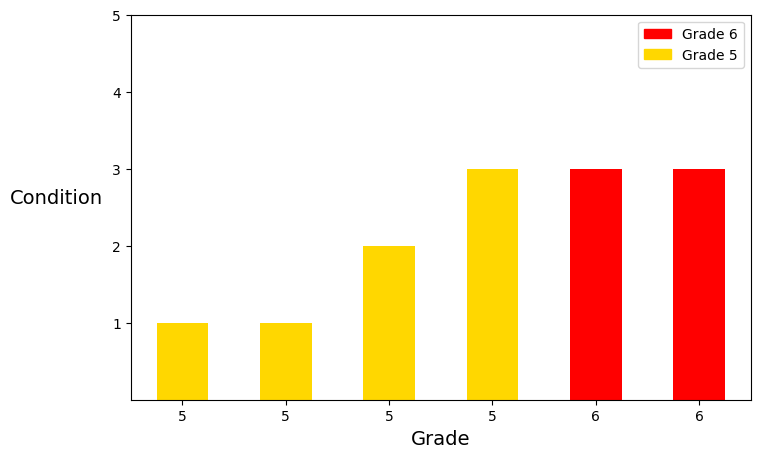

In [66]:
import matplotlib.patches as mpatches

df_low_prices_below85_poor_NH_sorted_conditions = df_low_prices_below85_poor_NH.sort_values(by='condition')
df_low_prices_below85_poor_NH_sorted_conditions = df_low_prices_below85_poor_NH_sorted_conditions.sort_values(by='grade')

# Create a dictionary to map grade values to colors
grade_colors = {6: 'red', 5: 'gold', 4: 'yellow', 3: 'green', 2: 'blue'}

# Map the grade values to colors using the dictionary
colors = df_low_prices_below85_poor_NH_sorted_conditions['grade'].map(grade_colors)

# Plot the data using the specified colors
ax = df_low_prices_below85_poor_NH_sorted_conditions.plot(kind='bar', x='grade', y='condition', color=colors)

# Add plot titles and labels
#plt.title("Conditions of houses below 85k")
plt.xlabel("Grade", fontsize = 14)
plt.ylabel("Condition", fontsize = 14, rotation = 0,labelpad=40)  # Adjust labelpad to move the label away from the y-axis
plt.xticks(rotation=0)  

# Customize the y-axis ticks
custom_ticks = [1, 2, 3, 4, 5] 
plt.yticks(custom_ticks)

# Create custom legend labels and handles
legend_labels = ['Grade 6', 'Grade 5']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(grade_colors.values(), legend_labels)]

# Add the custom legend to the plot
plt.legend(handles=legend_handles)

# Show the plot
plt.show()

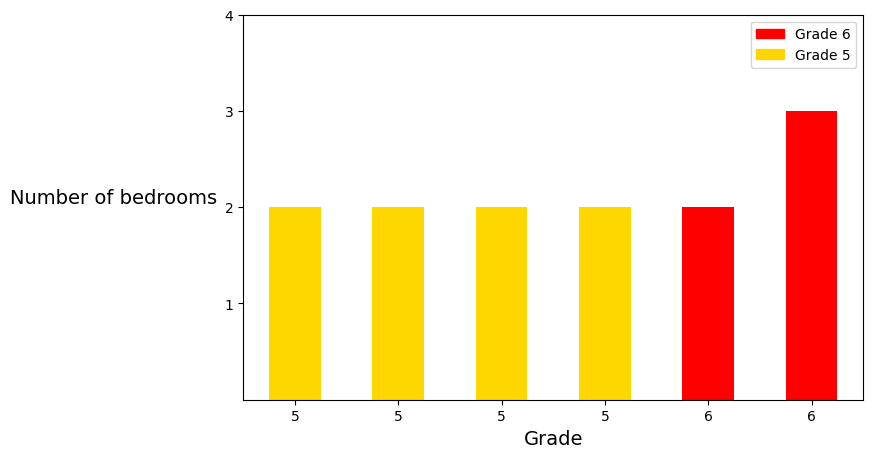

In [72]:
import matplotlib.patches as mpatches

df_low_prices_below85_poor_NH = df_low_prices_below85_poor_NH.sort_values(by='grade')

# Create a dictionary to map grade values to colors
grade_colors = {6: 'red', 5: 'gold', 4: 'yellow', 3: 'green', 2: 'blue'}

# Map the grade values to colors using the dictionary
colors = df_low_prices_below85_poor_NH['grade'].map(grade_colors)

# Plot the data using the specified colors
ax = df_low_prices_below85_poor_NH.plot(kind='bar', x='grade', y='bedrooms', color=colors)

# Add plot titles and labels
#plt.title("Conditions of houses below 85k")
plt.xlabel("Grade", fontsize = 14)
plt.ylabel("Number of bedrooms", fontsize = 14, rotation = 0,labelpad=80)  # Adjust labelpad to move the label away from the y-axis
plt.xticks(rotation=0)  

# Customize the y-axis ticks
custom_ticks = [1, 2, 3, 4] 
plt.yticks(custom_ticks)

# Create custom legend labels and handles
legend_labels = ['Grade 6', 'Grade 5']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(grade_colors.values(), legend_labels)]

# Add the custom legend to the plot
plt.legend(handles=legend_handles)

# Show the plot
plt.show()

In [74]:
df_low_prices_below85_poor_NH


,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,0.000,2,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,0.000,1,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,0.000,1,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,0.000,3,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,0.000,3,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,0.000,3,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000


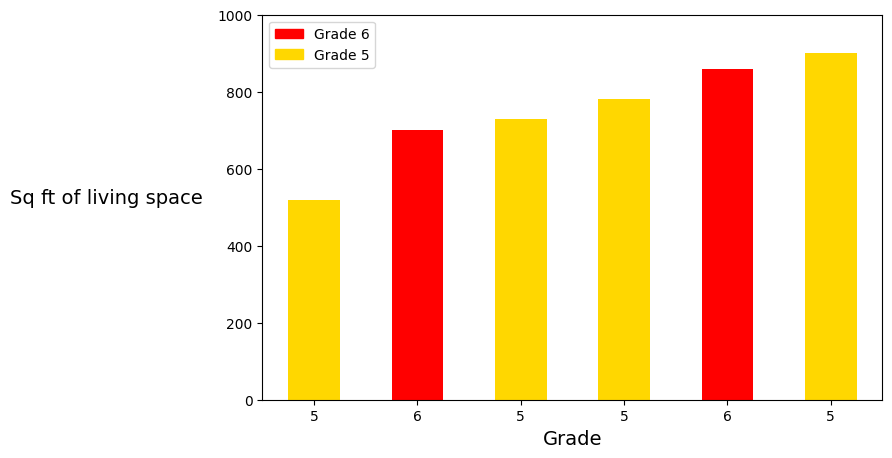

In [79]:
import matplotlib.patches as mpatches

df_low_prices_below85_poor_NH_sqft_living = df_low_prices_below85_poor_NH.sort_values(by='sqft_living')

# Create a dictionary to map grade values to colors 
grade_colors = {6: 'red', 5: 'gold', 4: 'yellow', 3: 'green', 2: 'blue'}

# Map the grade values to colors using the dictionary
colors = df_low_prices_below85_poor_NH_sqft_living['grade'].map(grade_colors)

# Plot the data using the specified colors
ax = df_low_prices_below85_poor_NH_sqft_living.plot(kind='bar', x='grade', y='sqft_living', color=colors)


# Set y-axis range 
lowest_value = 0  # Set the lowest temperature value on the y-axis
max_value = 1000  # Set the maximum temperature value on the y-axis

plt.ylim(lowest_value, max_value)
# Add plot titles and labels
#plt.title("Conditions of houses below 85k")
plt.xlabel("Grade", fontsize = 14)
plt.ylabel("Sq ft of living space", fontsize = 14, rotation = 0,labelpad=80)  # Adjust labelpad to move the label away from the y-axis
plt.xticks(rotation=0)  


# Create custom legend labels and handles
legend_labels = ['Grade 6', 'Grade 5']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(grade_colors.values(), legend_labels)]

# Add the custom legend to the plot
plt.legend(handles=legend_handles) 

# Show the plot
plt.show()

In [81]:

df_low_prices_below85_poor_NH_sqft_lot = df_low_prices_below85_poor_NH.sort_values(by='sqft_lot')


df_low_prices_below85_poor_NH_sqft_lot


,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,0.000,3,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,0.000,1,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,0.000,3,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,0.000,1,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,0.000,3,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,0.000,2,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000


In [85]:
df_low_prices_below85_poor_NH_sqft_lot.columns

Index(['index', 'date', 'price', 'house_id', 'sales_id', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [84]:
df_low_prices_below85_poor_NH_sqft_lot

,index,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,0.000,3,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
5,16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,0.000,1,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
3,8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,0.000,3,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000
4,15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,0.000,1,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
2,3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,0.000,3,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
1,2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,0.000,2,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000


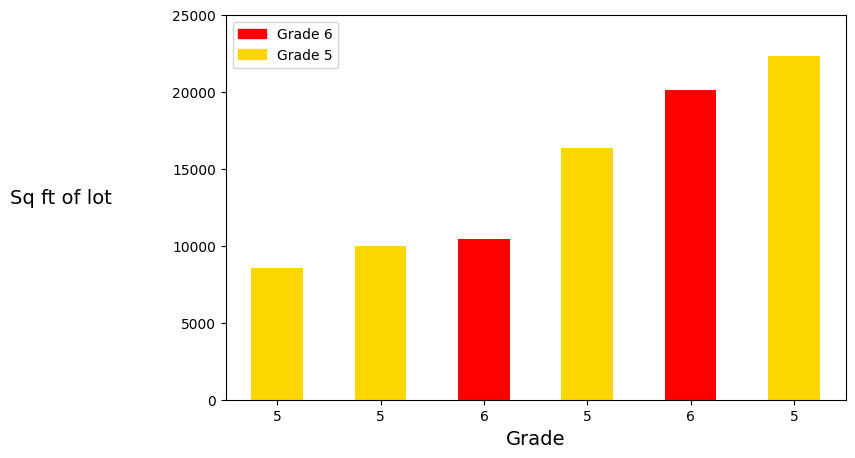

In [83]:
import matplotlib.patches as mpatches

df_low_prices_below85_poor_NH_sqft_lot = df_low_prices_below85_poor_NH.sort_values(by='sqft_lot')

# Create a dictionary to map grade values to colors 
grade_colors = {6: 'red', 5: 'gold', 4: 'yellow', 3: 'green', 2: 'blue'}

# Map the grade values to colors using the dictionary
colors = df_low_prices_below85_poor_NH_sqft_lot['grade'].map(grade_colors)

# Plot the data using the specified colors
ax = df_low_prices_below85_poor_NH_sqft_lot.plot(kind='bar', x='grade', y='sqft_lot', color=colors)


# Set y-axis range 
lowest_value = 0  # Set the lowest temperature value on the y-axis
max_value = 25000  # Set the maximum temperature value on the y-axis

plt.ylim(lowest_value, max_value)
# Add plot titles and labels
#plt.title("Conditions of houses below 85k")
plt.xlabel("Grade", fontsize = 14)
plt.ylabel("Sq ft of lot", fontsize = 14, rotation = 0,labelpad=80)  # Adjust labelpad to move the label away from the y-axis
plt.xticks(rotation=0)  


# Create custom legend labels and handles
legend_labels = ['Grade 6', 'Grade 5']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(grade_colors.values(), legend_labels)]

# Add the custom legend to the plot
plt.legend(handles=legend_handles) 

# Show the plot
plt.show()

Displaying the 24 houses cheaper than 100k on the map:

In [49]:
# Import folium
import folium
from folium import Marker

# Find houses in pandas dataframe df that our client might be interested in

# Define a map, centered at Space Needle in Seattle 
# ...you might also check out other options for tiles, e.g. tiles='openstreetmap'
map = folium.Map(location=[47.6,-122.33], tiles='cartodbpositron', zoom_start=8)

# Add markers to the map
for idx, row in df_low_prices.iterrows():
    Marker([row['lat'], row['long']]).add_to(map)

# Show the map
map

In [23]:
df_low_prices_below85

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,2014-05-23,80000.000,8658300340,466,1.000,0.750,430.000,5050.000,1.000,NaN,...,4,430.000,0.000,1912,0.000,98014,47.650,-121.909,1200.000,7500.000
2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
15279,2014-05-06,78000.000,40000362,15280,2.000,1.000,780.000,16344.000,1.000,0.000,...,5,780.000,0.000,1942,NaN,98168,47.474,-122.280,1700.000,10387.000
16184,2015-03-24,81000.000,3028200080,16185,2.000,1.000,730.000,9975.000,1.000,NaN,...,5,730.000,0.000,1943,0.000,98168,47.481,-122.315,860.000,9000.000
18453,2014-05-29,83000.000,7999600180,18454,2.000,1.000,900.000,8580.000,1.000,0.000,...,5,900.000,0.000,1918,0.000,98168,47.473,-122.270,2060.000,6533.000
3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
8267,2014-11-05,82000.000,3883800011,8268,3.000,1.000,860.000,10426.000,1.000,0.000,...,6,860.000,0.000,1954,0.000,98146,47.499,-122.341,1140.000,11250.000


Looking at the folium map, the dataframe and after a google search, it seems that zipcode 98168 is a poor neighborhood, 
filtering the initial dataframe for this zipcode: 

In [25]:
df_poor_NH = df.query('zipcode == 98168')

df_poor_NH 

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
118,2015-01-08,171800.000,3454800060,119,4.000,2.000,1570.000,9600.000,1.000,NaN,...,6,1570.000,0.000,1950,0.000,98168,47.496,-122.303,1880.000,9000.000
215,2015-01-15,280000.000,257000138,216,2.000,1.000,850.000,16400.000,1.000,0.000,...,6,850.000,0.000,1923,0.000,98168,47.489,-122.299,1100.000,14459.000
468,2015-01-07,340500.000,1723049270,469,3.000,2.000,2270.000,28025.000,1.000,0.000,...,7,1920.000,350.000,1947,NaN,98168,47.486,-122.318,1770.000,14833.000
549,2014-05-28,215000.000,5000500055,550,2.000,1.000,1320.000,8865.000,1.000,0.000,...,6,1320.000,0.000,1943,0.000,98168,47.495,-122.300,1190.000,6490.000
595,2014-06-04,240500.000,8018600765,596,3.000,1.750,1460.000,10584.000,1.000,0.000,...,7,990.000,470.000,1997,0.000,98168,47.492,-122.317,1220.000,12012.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,2015-02-26,347500.000,6031400094,20196,5.000,3.000,2230.000,6551.000,1.000,NaN,...,7,1330.000,900.000,2014,NaN,98168,47.487,-122.320,2230.000,9476.000
20871,2014-12-01,355000.000,133000271,20872,5.000,2.500,2540.000,5100.000,2.000,NaN,...,7,2540.000,0.000,2014,0.000,98168,47.512,-122.316,1400.000,9440.000
20892,2014-05-29,350000.000,923049203,20893,4.000,2.500,2040.000,22653.000,2.000,0.000,...,7,2040.000,0.000,2011,0.000,98168,47.499,-122.299,2020.000,20502.000
20961,2014-08-26,268000.000,7889601165,20962,3.000,2.500,1700.000,2250.000,2.000,0.000,...,7,1700.000,0.000,2014,0.000,98168,47.491,-122.334,1520.000,4500.000


In [26]:
df_poor_NH.describe()

,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,269.000,269.000,269.000,269.000,269.000,269.000,269.000,269.000,230.000,268.000,...,269.000,269.000,262.000,269.000,220.000,269.000,269.000,269.000,269.000,269.000
mean,240328.372,3204784607.100,10264.249,2.996,1.433,1468.625,11269.844,1.160,0.000,0.015,...,6.509,1234.089,235.305,1952.721,542.045,98168.000,47.490,-122.308,1471.680,9744.022
std,69984.819,2743319130.696,5840.203,0.928,0.614,561.558,7190.513,0.312,0.000,0.172,...,0.710,444.980,369.600,19.643,3244.641,0.000,0.012,0.020,344.109,3406.543
min,78000.000,2800031.000,119.000,1.000,0.750,380.000,2250.000,1.000,0.000,0.000,...,5.000,380.000,0.000,1900.000,0.000,98168.000,47.470,-122.335,810.000,4500.000
25%,199950.000,985000833.000,4909.000,2.000,1.000,1060.000,7200.000,1.000,0.000,0.000,...,6.000,970.000,0.000,1942.000,0.000,98168.000,47.479,-122.324,1220.000,7500.000
50%,235000.000,2123049086.000,10377.000,3.000,1.000,1380.000,8867.000,1.000,0.000,0.000,...,7.000,1150.000,0.000,1950.000,0.000,98168.000,47.489,-122.312,1430.000,9078.000
75%,285000.000,6031400071.000,15450.000,4.000,1.750,1820.000,12040.000,1.000,0.000,0.000,...,7.000,1400.000,400.000,1961.000,0.000,98168.000,47.499,-122.297,1690.000,10690.000
max,600000.000,9572000080.000,21397.000,5.000,4.500,4440.000,49658.000,2.000,0.000,2.000,...,10.000,4440.000,1450.000,2014.000,20130.000,98168.000,47.514,-122.258,2990.000,28400.000


Further filtering this dataframe for houses cheaper than 150 k:

In [29]:
df_poor_NH.query('price < 150000')

,date,price,house_id,sales_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2139,2014-05-08,82500.000,1623049041,2140,2.000,1.000,520.000,22334.000,1.000,0.000,...,5,520.000,0.000,1951,0.000,98168,47.480,-122.296,1572.000,10570.000
3350,2014-05-29,145000.000,6099400053,3351,3.000,1.000,1010.000,5490.000,1.000,0.000,...,6,1010.000,0.000,1954,0.000,98168,47.476,-122.293,1740.000,10658.000
3615,2015-04-22,122000.000,1446401460,3616,2.000,1.000,760.000,5280.000,1.000,0.000,...,6,760.000,NaN,1946,0.000,98168,47.483,-122.330,1710.000,6594.000
3763,2015-04-30,84000.000,1523049188,3764,2.000,1.000,700.000,20130.000,1.000,0.000,...,6,700.000,0.000,1949,0.000,98168,47.475,-122.271,1490.000,18630.000
4085,2014-06-04,135000.000,985001015,4086,1.000,1.000,790.000,13062.000,1.000,0.000,...,6,790.000,0.000,1942,0.000,98168,47.492,-122.311,1240.000,7137.000
7219,2014-07-02,123000.000,1446403617,7220,2.000,1.000,1050.000,6600.000,1.500,NaN,...,6,1050.000,0.000,1964,NaN,98168,47.483,-122.324,1330.000,6600.000
7238,2014-09-16,118125.000,1446403850,7239,2.000,1.000,790.000,7153.000,1.000,0.000,...,6,790.000,0.000,1944,0.000,98168,47.487,-122.324,810.000,7128.000
9810,2014-10-03,124000.000,3598600049,9811,1.000,0.750,840.000,7203.000,1.500,0.000,...,6,840.000,0.000,1949,NaN,98168,47.476,-122.301,1560.000,8603.000
10376,2014-10-30,134000.000,3361402041,10377,3.000,1.000,1270.000,8508.000,1.000,0.000,...,6,650.000,620.000,1942,NaN,98168,47.496,-122.322,1200.000,9415.000
10758,2014-06-16,92000.000,795000765,10759,2.000,1.000,760.000,5500.000,1.500,NaN,...,5,760.000,0.000,1947,NaN,98168,47.505,-122.329,1040.000,5515.000


All of these houses might be interesting for the client.